In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv(r"C:\Users\Home\Downloads\Transfusion\transfusion.csv")

WHERE:
R (Recency - months since last donation),
F (Frequency - total number of donation),
M (Monetary - total blood donated in c.c.),
T (Time - months since first donation), and
a binary variable representing whether he/she donated blood in March 2007 (1
stand for donating blood; 0 stands for not donating blood).

In [4]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
df.shape

(748, 5)

In [6]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
df.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


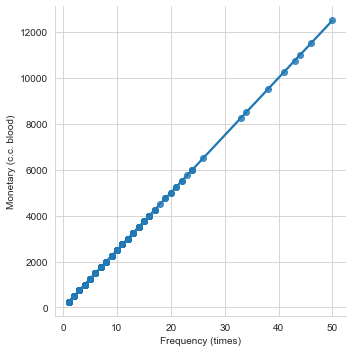

In [8]:
sns.lmplot(data=df,x='Frequency (times)', y='Monetary (c.c. blood)')

In [9]:
df[df['Frequency (times)'] == 1]['Monetary (c.c. blood)'].unique()

array([250], dtype=int64)

Couple of interesting points I should take note off:

(mean of Frequency):
I cannot just say that most people donate blood around 5 times because I have a very large standard deviation and clearly as seen later on in the analysis this is due to outliers of subjects that have donated blood 30 or more times
Same thing applies to the other means
Frequency and Monetary (c.c. blood) are directly correlated since each time you donate blood the clinic gets 250c.c.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Let's do some exploratory data analysis to get a better idea of the data:

First lets check out the distribution of how long ago people started donating blood to this clinic

In [11]:
mini = df['Time (months)'].min()
maxi = df['Time (months)'].max()

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time (months)', ylabel='Density'>

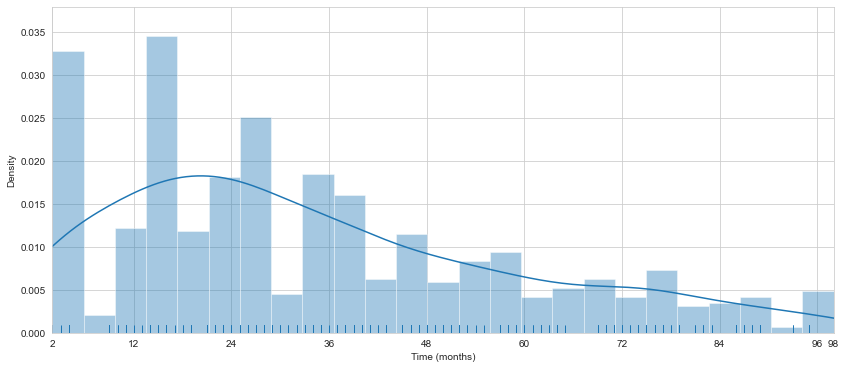

In [12]:
plt.figure(figsize=(14,6))
plt.xlim(mini,maxi) ##no data of people donating in the last month sto I start from 2 months ago
plt.xticks([mini,12,24,36,48,60,72,84,96,maxi])
sns.distplot(df['Time (months)'],bins=25,rug=True)

In [13]:
df['Frequency (times)'].value_counts().sort_values(ascending=False).head(10)

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
Name: Frequency (times), dtype: int64

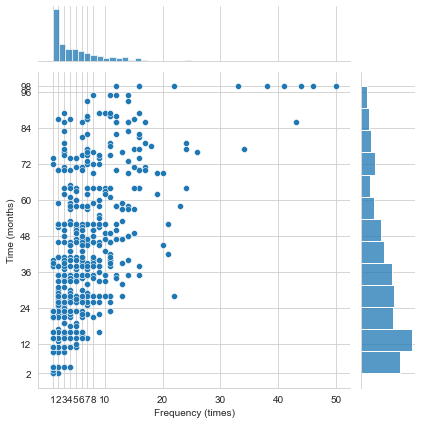

In [14]:
j = sns.jointplot(x='Frequency (times)',y='Time (months)',data=df)
j.ax_joint.set_xticks([1,2,3,4,5,6,7,8,10,20,30,40,50])
j.ax_joint.set_yticks([mini,12,24,36,48,60,72,84,96,maxi])

Let's answer the question of how many people of the once that have only donated once just started doing so in the last couple of years

In [15]:
df[(df['Frequency (times)'] == 1) & (df['Time (months)'] < 25)].count()

Recency (months)                              152
Frequency (times)                             152
Monetary (c.c. blood)                         152
Time (months)                                 152
whether he/she donated blood in March 2007    152
dtype: int64

In [16]:
df[(df['Frequency (times)'] > 1) & (df['Time (months)'] < 25) ].count()

Recency (months)                              164
Frequency (times)                             164
Monetary (c.c. blood)                         164
Time (months)                                 164
whether he/she donated blood in March 2007    164
dtype: int64

In [17]:
df[(df['Frequency (times)'] > 1) & (df['Time (months)'] < 25) & (df['whether he/she donated blood in March 2007']==1)].count()

Recency (months)                              53
Frequency (times)                             53
Monetary (c.c. blood)                         53
Time (months)                                 53
whether he/she donated blood in March 2007    53
dtype: int64

52/164 ~32% of them

Seems like I cannot take an educated guess for whether or not people will donate blood more than once not just based on how long they have been a donor with much accuracy

Time for a pairplot to check out the pairwise relation of all my variables

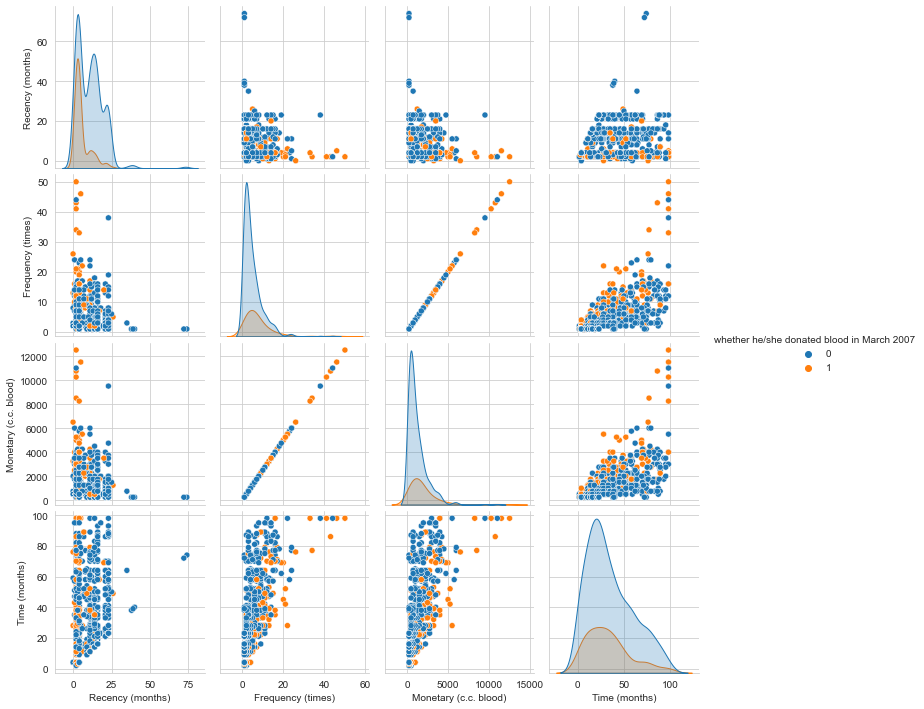

In [18]:
sns.pairplot(data=df,hue='whether he/she donated blood in March 2007')

Let's create a machine learning models that can better analyze my data and come up with predictions

Split my data to a training and a testing set

In [20]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [21]:
X = df[['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)','Time (months)']] ## The variables I will use to predict
y = df['whether he/she donated blood in March 2007']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98) 

For starters let's use a simple

logistic regression model

In [24]:
logmodel = LogisticRegression()
log_pred = logmodel.fit(X_train,y_train).predict(X_test)

Time to make some predictions:

and evaluate our model

In [26]:
print(confusion_matrix(y_test, log_pred), '\n\n', classification_report(y_test, log_pred))

[[171   2]
 [ 46   6]] 

               precision    recall  f1-score   support

           0       0.79      0.99      0.88       173
           1       0.75      0.12      0.20        52

    accuracy                           0.79       225
   macro avg       0.77      0.55      0.54       225
weighted avg       0.78      0.79      0.72       225



78% accuracy for such a simple model is very good

2 Type 1 errors ( False Positive )
46 Type 1 errors ( False Negative )

In [27]:
y_test.value_counts()

0    173
1     52
Name: whether he/she donated blood in March 2007, dtype: int64

Time to standardize our features

In [30]:
scaler = StandardScaler()
scaler.fit(X) 

StandardScaler()

In [31]:
scaled_features = scaler.transform(X)
##scaled
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_features, y, test_size=0.3, random_state=98) 

Scaling of features does NOT affect Logistic Regression

Time to try a different model.

K-Nearest Neighbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Without the scaled features:

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
pred_1_not_scaled = knn.fit(X_train,y_train).predict(X_test)

In [34]:
pred_1_not_scaled = knn.predict(X_test)
print(confusion_matrix(y_test,pred_1_not_scaled), '\n\n', classification_report(y_test,pred_1_not_scaled))

[[142  31]
 [ 31  21]] 

               precision    recall  f1-score   support

           0       0.82      0.82      0.82       173
           1       0.40      0.40      0.40        52

    accuracy                           0.72       225
   macro avg       0.61      0.61      0.61       225
weighted avg       0.72      0.72      0.72       225



Seems pretty bad, let's try with different n_neighbors=2 ( with the scaled features)

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
pred_2 = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,pred_2), '\n\n', classification_report(y_test,pred_2))

[[159  14]
 [ 37  15]] 

               precision    recall  f1-score   support

           0       0.81      0.92      0.86       173
           1       0.52      0.29      0.37        52

    accuracy                           0.77       225
   macro avg       0.66      0.60      0.62       225
weighted avg       0.74      0.77      0.75       225



In [37]:
error_rate = []
training_accuracy = []
test_accuracy = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))
    training_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled,y_test))

([<matplotlib.axis.XTick at 0x21c7f2ce9d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

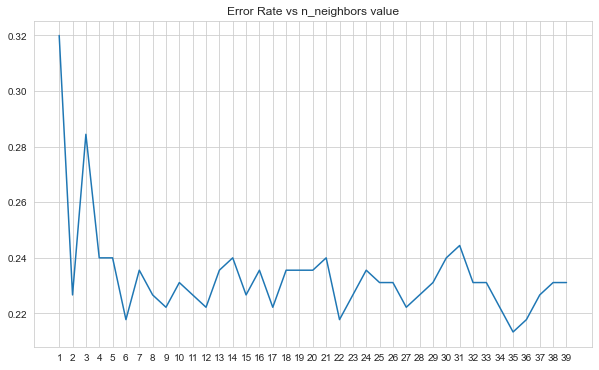

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs n_neighbors value')
plt.xticks(range(1,40))

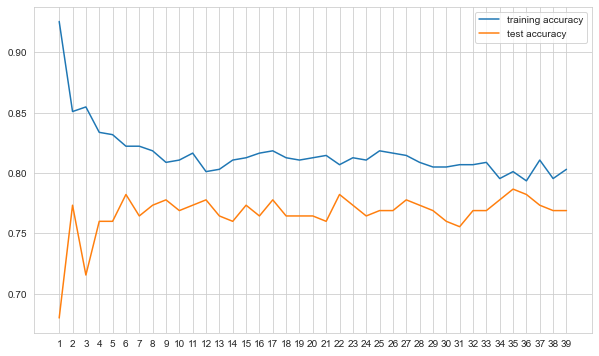

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), training_accuracy, label='training accuracy')
plt.plot(range(1,40), test_accuracy, label='test accuracy')
plt.xticks(range(1,40))
plt.legend()

([<matplotlib.axis.XTick at 0x21c7f4029d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

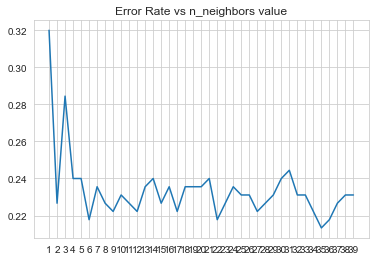

In [40]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs n_neighbors value')
plt.xticks(range(1,40))

In [41]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
knn_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,knn_pred), '\n\n', classification_report(y_test,knn_pred))

[[159  14]
 [ 35  17]] 

               precision    recall  f1-score   support

           0       0.82      0.92      0.87       173
           1       0.55      0.33      0.41        52

    accuracy                           0.78       225
   macro avg       0.68      0.62      0.64       225
weighted avg       0.76      0.78      0.76       225



78% > 76% accuracy

Logistic Regression has thus far performed better than KNN

Time for a 3rd Model
Decision Trees!

In [44]:
dtree = DecisionTreeClassifier().fit(X_train,y_train)

In [45]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred), '\n\n', classification_report(y_test,dtree_pred))

[[145  28]
 [ 32  20]] 

               precision    recall  f1-score   support

           0       0.82      0.84      0.83       173
           1       0.42      0.38      0.40        52

    accuracy                           0.73       225
   macro avg       0.62      0.61      0.61       225
weighted avg       0.73      0.73      0.73       225



Random Forest

In [47]:
rfc = RandomForestClassifier(n_estimators=150)
rfc_pred = rfc.fit(X_train,y_train).predict(X_test)

In [48]:
print(confusion_matrix(y_test,rfc_pred), '\n\n', classification_report(y_test,rfc_pred))

[[150  23]
 [ 31  21]] 

               precision    recall  f1-score   support

           0       0.83      0.87      0.85       173
           1       0.48      0.40      0.44        52

    accuracy                           0.76       225
   macro avg       0.65      0.64      0.64       225
weighted avg       0.75      0.76      0.75       225



Gradient Boosting Classifier

In [50]:
gbc = GradientBoostingClassifier(random_state=98,max_depth=2)
gbc_pred = gbc.fit(X_train_scaled,y_train).predict(X_test_scaled)

In [51]:
print(confusion_matrix(y_test,gbc_pred), '\n\n', classification_report(y_test,gbc_pred))

[[153  20]
 [ 35  17]] 

               precision    recall  f1-score   support

           0       0.81      0.88      0.85       173
           1       0.46      0.33      0.38        52

    accuracy                           0.76       225
   macro avg       0.64      0.61      0.61       225
weighted avg       0.73      0.76      0.74       225



In [52]:
test_acc = []
train_acc = []
for i in range(1,40):
    gbc = GradientBoostingClassifier(random_state=98,max_depth=1,learning_rate=1,n_estimators=i)
    gbc_pred_i = gbc.fit(X_train_scaled,y_train).predict(X_test_scaled)  
    test_acc.append(gbc.score(X_test_scaled,y_test))
    train_acc.append(gbc.score(X_train_scaled,y_train))

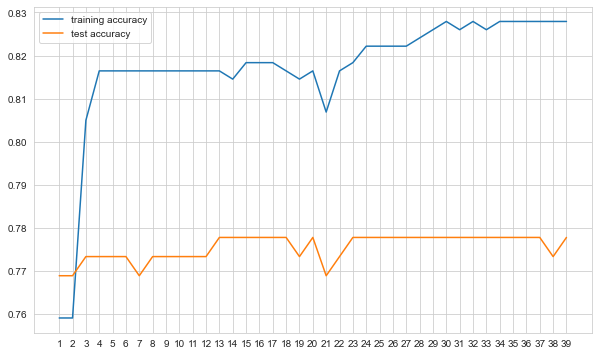

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), train_acc, label='training accuracy')
plt.plot(range(1,40), test_acc, label='test accuracy')
plt.xticks(range(1,40))
plt.legend()

Support Vector Machines

In [55]:
svmodel = SVC()
svmodel.fit(X_train,y_train)

SVC()

In [56]:
svmodel_pred = svmodel.predict(X_test)
print(confusion_matrix(y_test,svmodel_pred), '\n\n', classification_report(y_test,svmodel_pred))

[[172   1]
 [ 52   0]] 

               precision    recall  f1-score   support

           0       0.77      0.99      0.87       173
           1       0.00      0.00      0.00        52

    accuracy                           0.76       225
   macro avg       0.38      0.50      0.43       225
weighted avg       0.59      0.76      0.67       225

